In [27]:
import numpy as np
import matplotlib.pyplot as plt

t, wcd1, wcd2, wcd3, ssd = np.loadtxt('/home/filip/Desktop/calib.test', unpack=True, usecols=[0,2,4,6,8])

In [28]:
t_acq = np.diff(t)
mask = np.where(t_acq > 0)[0]
wcd1 = wcd1[1:][mask]
wcd2 = wcd2[1:][mask]
wcd3 = wcd3[1:][mask]
ssd = ssd[1:][mask]
t_acq = t_acq[mask]

In [29]:
acquisition_times = np.unique(t_acq)
histos = {_t : [] for _t in acquisition_times}

for _t in acquisition_times:
    acq_mask = np.where(t_acq == _t)[0]
    histos[_t] = [pmt[acq_mask] for pmt in [wcd1, wcd2, wcd3, ssd]]


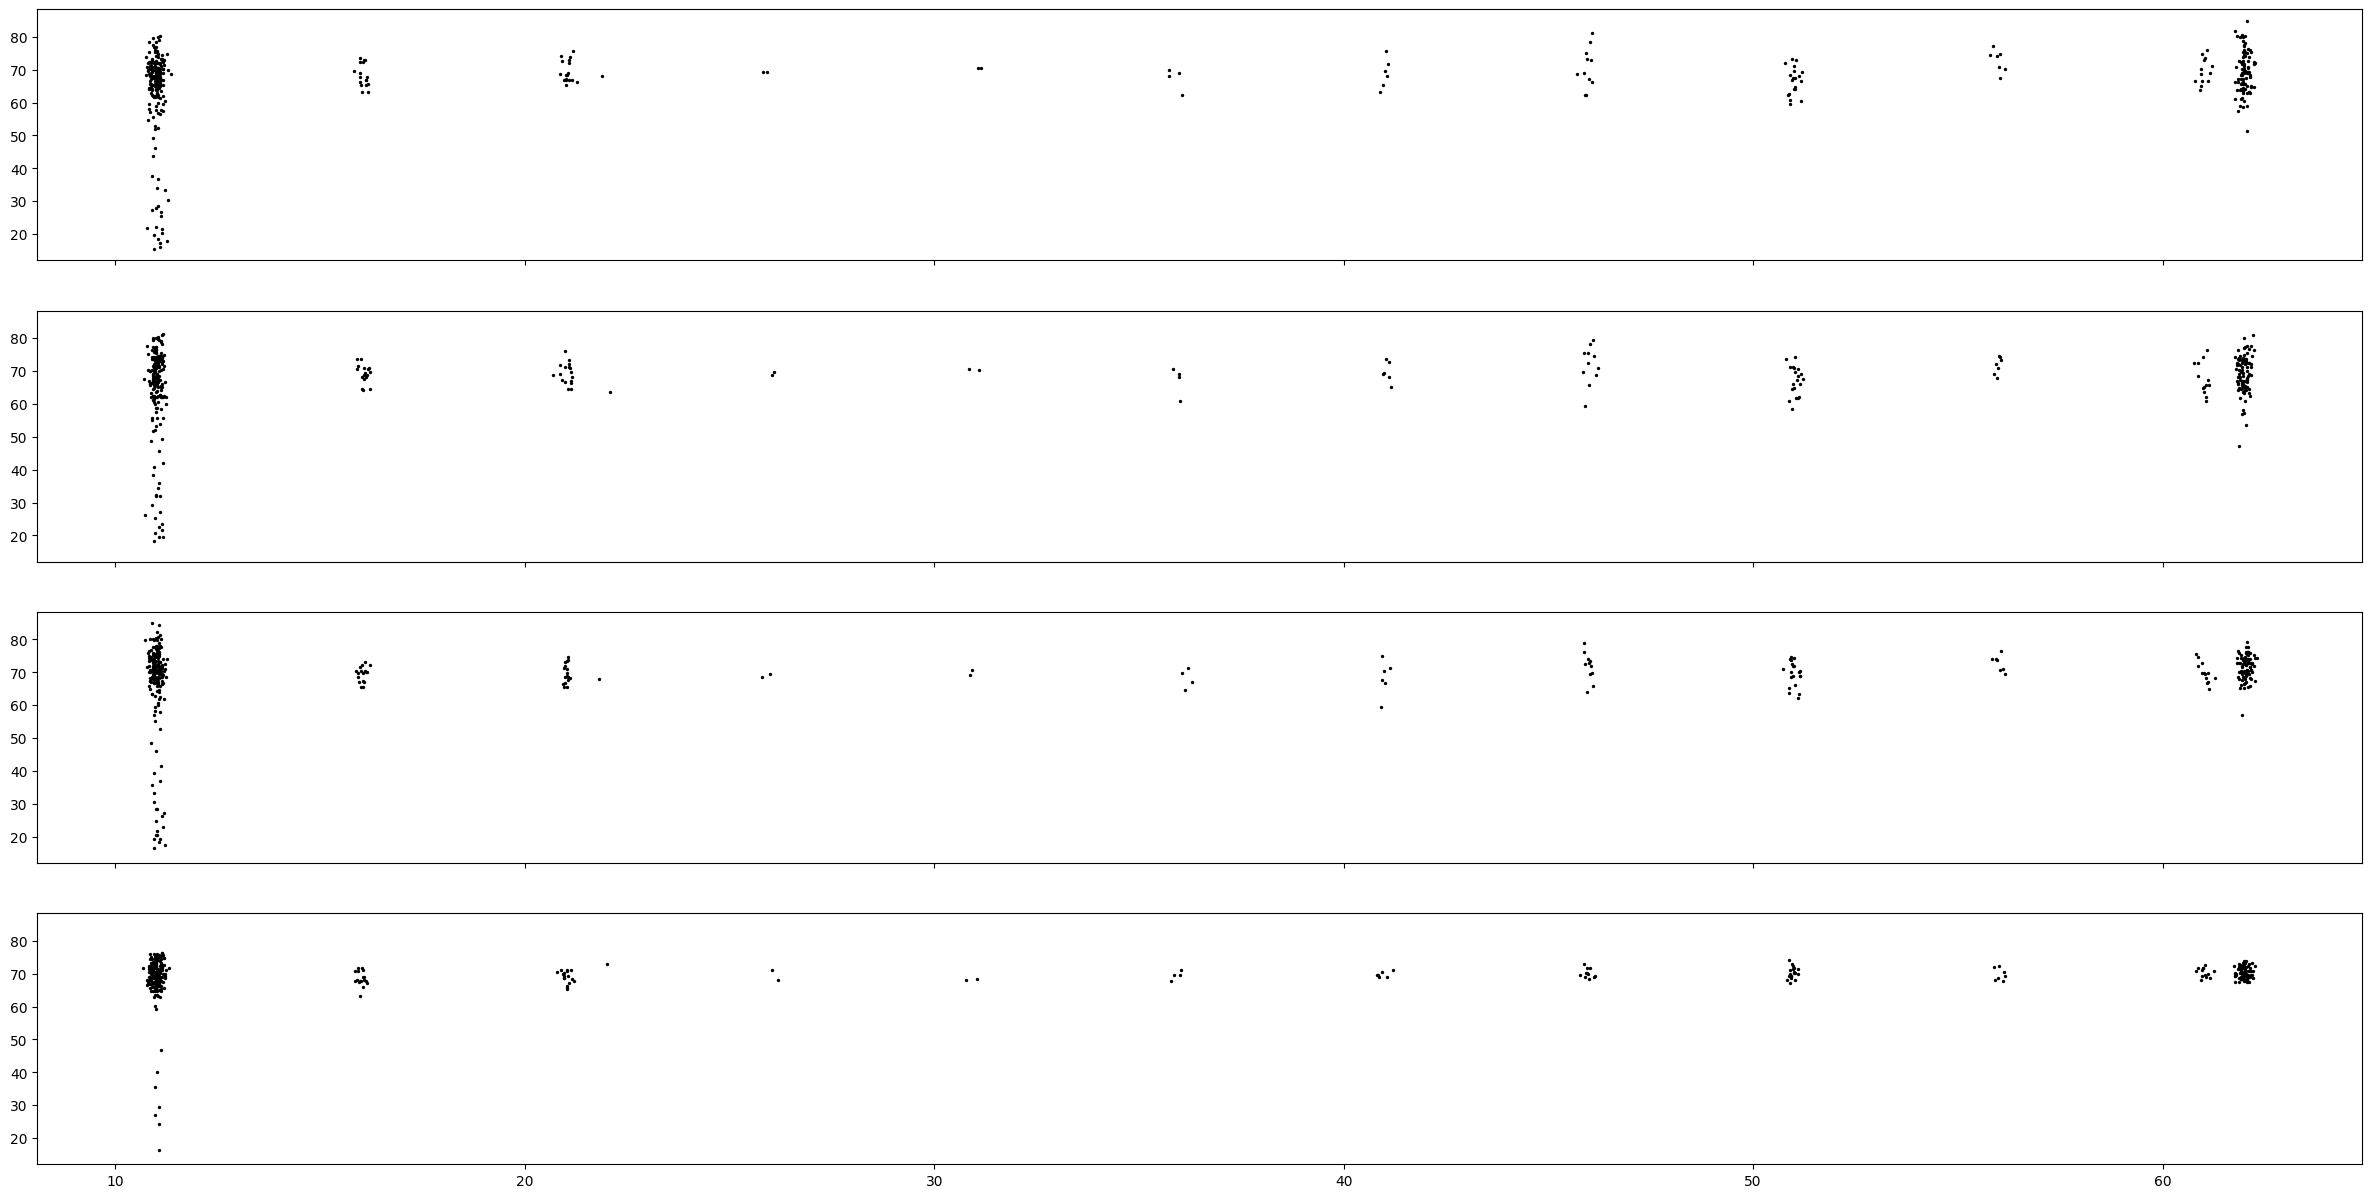

In [47]:

plt.rcParams['figure.figsize'] = [30, 15]
_, axes = plt.subplots(4, sharex=True, sharey=True)

stds = [[0 for _ in acquisition_times] for _ in range(4)]
for i, _t in enumerate(acquisition_times):
    for j, (ax, pmt) in enumerate(zip(axes, histos[_t])):
        ax.scatter(np.random.normal(_t, 0.1, size=len(pmt)), pmt, c='k', s=2)
        stds[j][i] = np.std(pmt)

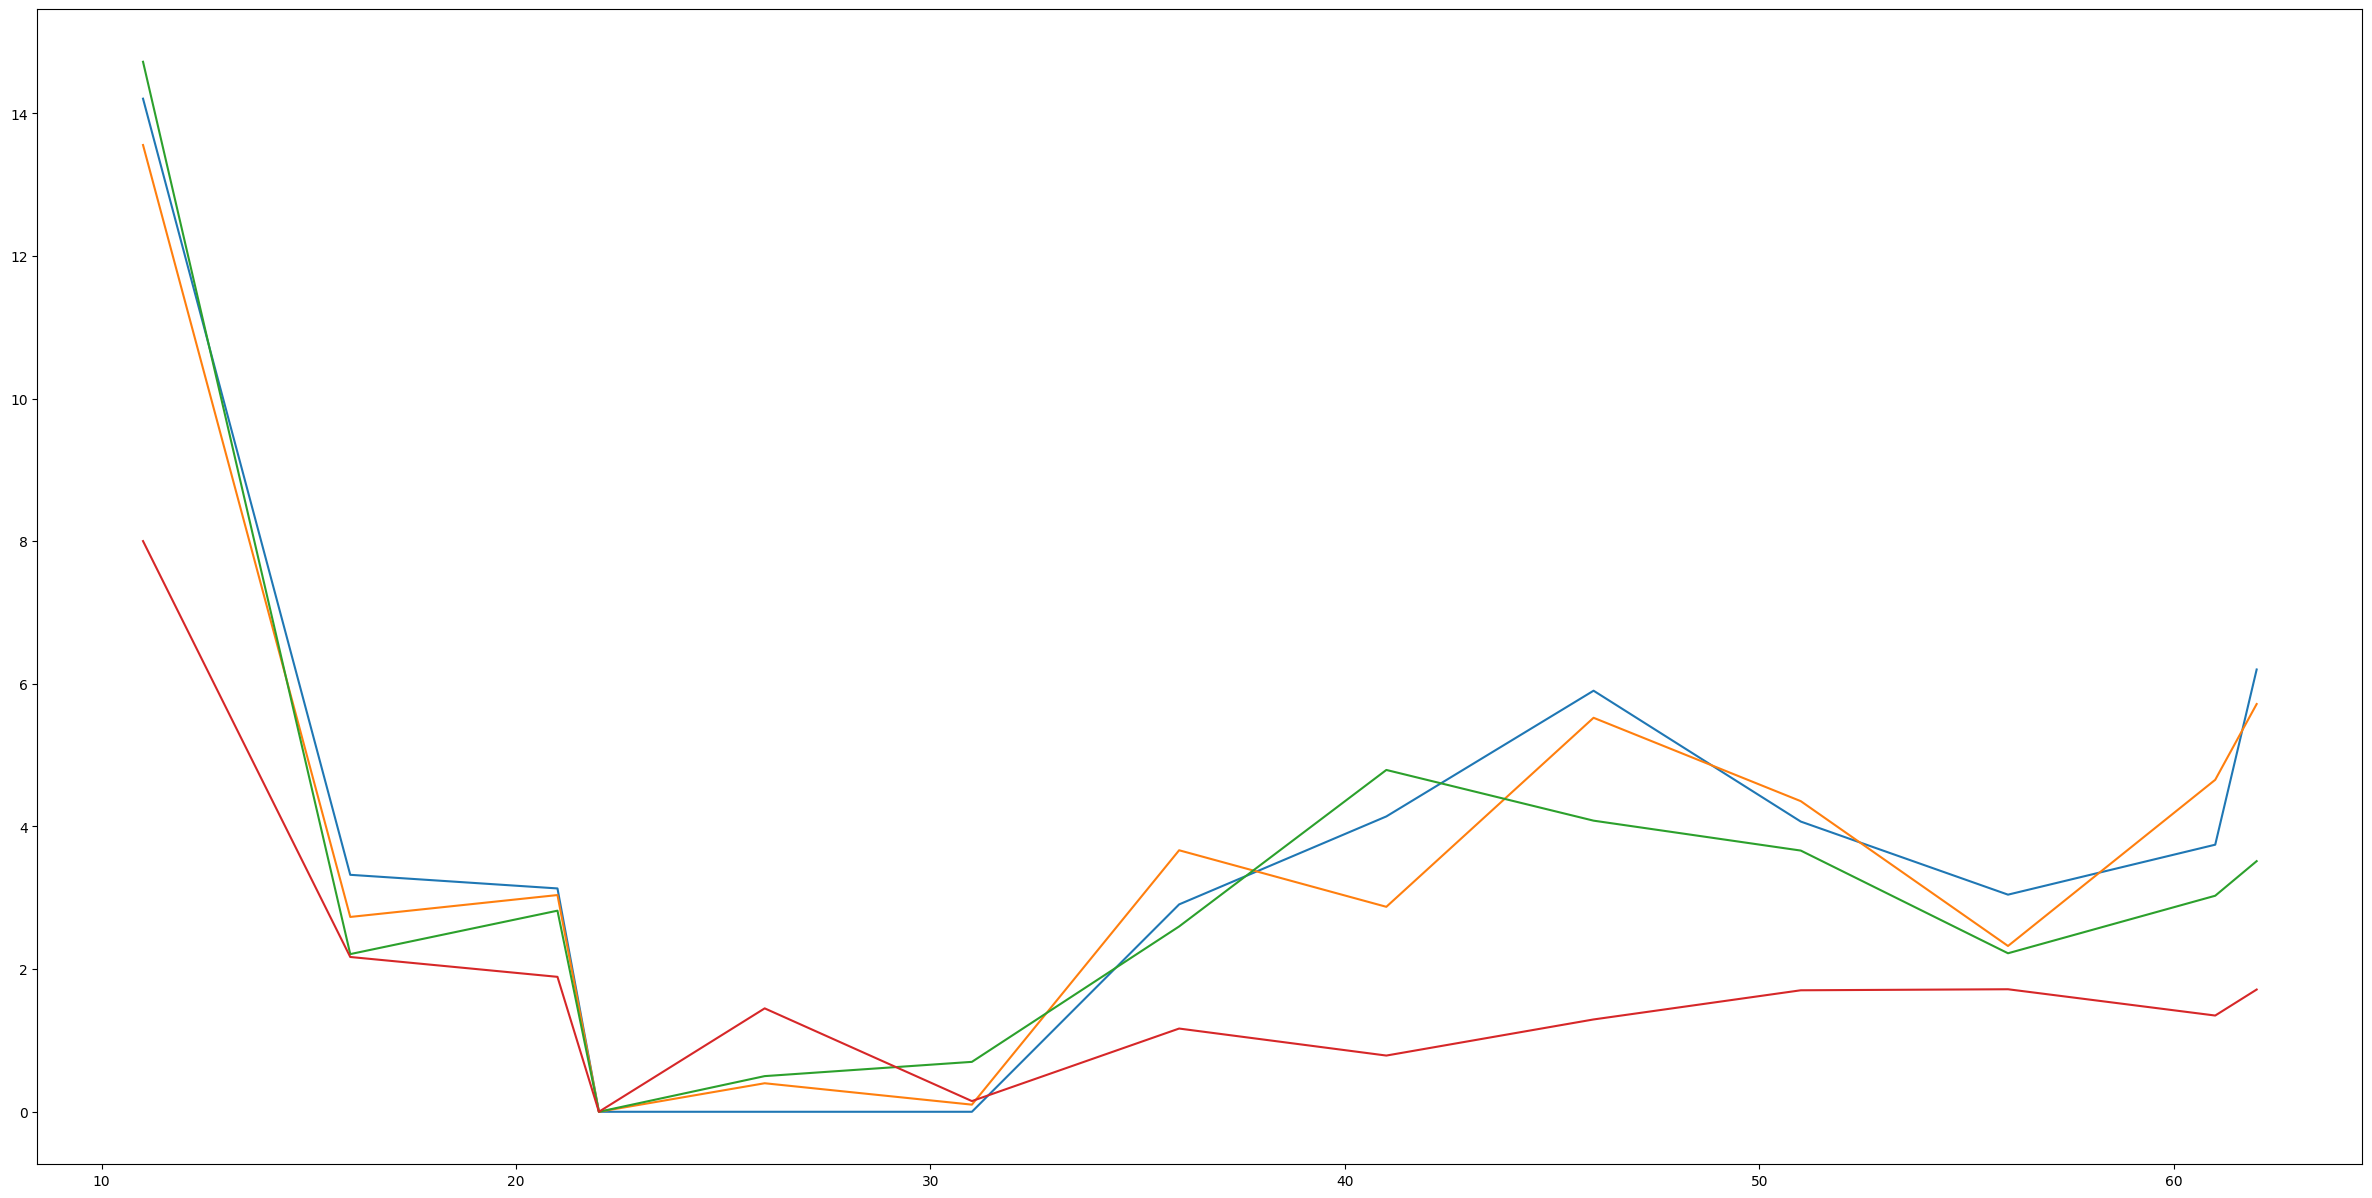

In [49]:
for pmt in stds:
    plt.plot(acquisition_times, pmt)